# *Titanic Challenge*
> The goal of this project is to use Classification algorithms to predict what passengers will survive the sinking of the <a href="https://www.kaggle.com/competitions/titanic" target="_blank"> Titianic</a>.

> <a href="https://scikit-learn.org/stable/modules/ensemble.html?highlight=gridsearchcv#" target="_blank"> Sklearn ensemble methods artical</a>.


## Prepare work space:

In [8]:
# upload the needed libarys 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import time
import scipy 

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC

In [9]:
warnings.filterwarnings('ignore')

In [10]:
# upload the data 
train_data = pd.read_csv('~/Desktop/ADAN7430/data/train.csv')

In [11]:
# Load the test data 
titanic_test_data = pd.read_csv('~/Desktop/ADAN7430/data/test.csv')

In [12]:
# show the data training
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Prep:

In [13]:
# Quick initial check for missing data using a boolean statement 
# True means there is missing data 
# False means there is NO missing data 
print(train_data.isnull().values.any())

True


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
# descriptive statistics 
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1. The `SratifiedSuffleSplit` function will be used to create training and validation data sets *80/20* with equal preportions of the target variable. 
2. Then a `Pipeline` will be created that cleans the data automatically. 
3. Lastly we will scale the data using `StandardScaler`

In [16]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [17]:
# Split up the training data so that we can evaluate the accuracy of the model before making predictions with the
# test data. This section splits up the data with equal preportions of Survived, Pclass, and Sex variables. 

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(train_data,train_data[["Survived", "Pclass", "Sex"]]):
    strat_train = train_data.loc[train_indices] # Training data
    strat_val = train_data.loc[test_indices] # Validation data 

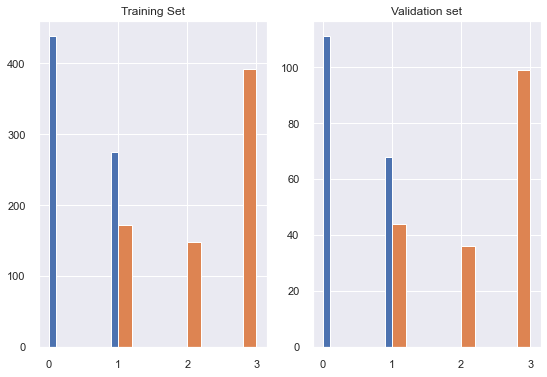

In [18]:
# show that there are even preportions of Survived Pclass and sex in each group
# in theory this allows for more realistic training and Validation sets 
# plot the the eval and training sets for the model 

plt.figure(figsize=(9,6))
sns.set(style="darkgrid")
plt.subplot(1,2,1)
plt.title('Training Set')
strat_train['Survived'].hist()
strat_train['Pclass'].hist()

plt.subplot(1,2,2)
plt.title('Validation set')
strat_val['Survived'].hist()
strat_val['Pclass'].hist()

plt.show()

In [19]:
# information about the features 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data Cleaning:
This data set has Numerous issues that our model cannot handle so there is some data cleaning that will need to happen before we can train our model. To do this job we will create a <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html" target="_blank">Pipeline</a> that will contain our data cleaning functions. This will allow us to clean data sets just by calling `pipeline.fit_transform(Data)`. 
  
The Fist issue that must be resolved is the missing data in 4 of our features `Age` , `Cabin `, `Embarked `and` Fare`. Next we must create dummy varaibles with the `OneHotEncoder` function the `Embarked` and `Sex` variables because the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html" target="_blank">RandomForrest</a> model that we will use can not handel catagrical variabes. Then the new dummy variable matrix have to be transposed so that the new matrix can fit into our existing data. Then lastly we will have to drop the variables that will not be used in our model. 


<a href="url" target="_blank">hyperlinked words</a>



Data cleaining Pipeline: 

1. Create `AgeImputer` object that will use <a href="https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer" target="_blank"> KNNImputer</a> to fill in the missing values.

In [20]:
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.impute import KNNImputer

class AgeImputer(BaseEstimator, TransformerMixin):

    def fit(self,X,y =None): 
        return self
    
    def transform(self, X):
        imputer = KNNImputer(n_neighbors=5) # KNN Imputer 
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

2. Create `FareImputer` object that will use  <a href="https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer" target="_blank"> KNNImputer</a> to fill in the missing values. 

In [21]:
# Fare is missing one value in the Test data set
class FareImputer(BaseEstimator, TransformerMixin):

    def fit(self,X,y =None):
        return self
    
    def transform(self, X):
        imputer = KNNImputer(n_neighbors=5) # KNN Imputer 
        X['Fare'] = imputer.fit_transform(X[['Fare']])
        return X

3. Create `FeatureEncoder` object that will  <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html" target="_blank">One-Hot-Encode</a> `Embarked` and `Sex` into dummys. Then transpose the new dummy data to make it fit into the the existing dataframe.

In [22]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X,y =None):
        return self
    
    def transform(self,X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['Embarked']]).toarray()  # hot encoded Embarked 
        
        column_names = ["C","S", "Q", "N"]  # new dummy columns 
        
        for i in range(len(matrix.T)):   # transpose hot encoded values 
            X[column_names[i]] = matrix.T[i]
            
        matrix = encoder.fit_transform(X[['Sex']]).toarray()  # hot encoded sex
        
        column_names = ["Female","Male"]   # new dummy columns 
        
        for i in range(len(matrix.T)):  # transpose hot encoded values
            X[column_names[i]] = matrix.T[i]
            
        return X

4. Create `FeatureDropper` object that will drop the varaibles that will not be usefull in our model. 

In [23]:
# drop the un-needed features 

class FeatureDropper(BaseEstimator,TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self,X,):
        return X.drop(["Embarked", "Name", "Ticket", "Cabin", "Sex","N", "Male", "PassengerId"], axis=1, errors= "ignore")

5. Define the `pipeline` that houses all of the data cleaning objects that where created in steps 1-4

In [24]:
# create the pipline that preforms the cleaning task 
from sklearn.pipeline import Pipeline 

pipeline = Pipeline([("ageimputer",AgeImputer()),
                    ("fareimputer",FareImputer()),
                    ("featureencoder", FeatureEncoder()),
                    ("featuredropper", FeatureDropper())])

<div class="alert alert-block alert-success">
<b>Success:</b> The data pipeline has been created and is ready to use on our data.</div>

In [25]:
# use the pipeline to clean strat_train 
# Change name to df
df = pipeline.fit_transform(strat_train)

In [26]:
# Check that the cleaning process worked correctly 
df

,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female
699,0,3,42.000000,0,0,7.6500,0.0,0.0,1.0,0.0
245,0,1,44.000000,2,0,90.0000,0.0,1.0,0.0,0.0
451,0,3,29.899601,1,0,19.9667,0.0,0.0,1.0,0.0
321,0,3,27.000000,0,0,7.8958,0.0,0.0,1.0,0.0
448,1,3,5.000000,2,1,19.2583,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
747,1,2,30.000000,0,0,13.0000,0.0,0.0,1.0,1.0
154,0,3,29.899601,0,0,7.3125,0.0,0.0,1.0,0.0
740,1,1,29.899601,0,0,30.0000,0.0,0.0,1.0,0.0
816,0,3,23.000000,0,0,7.9250,0.0,0.0,1.0,1.0


In [27]:
#double check the cleaing process worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 699 to 167
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   C         712 non-null    float64
 7   S         712 non-null    float64
 8   Q         712 non-null    float64
 9   Female    712 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 61.2 KB


## Data Visualization and exploration: 

In [28]:
# descriptive statistics 
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.384831,2.308989,29.899601,0.525281,0.390449,32.685492,0.188202,0.084270,0.726124,0.351124
std,0.486897,0.835249,13.315651,1.090520,0.816027,51.500012,0.391148,0.277987,0.446260,0.477657
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.899601,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000
75%,1.000000,3.000000,36.000000,1.000000,0.000000,31.275000,0.000000,0.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


- 35% Of passengers in the data set are Women. 
- 38% of passengers survived

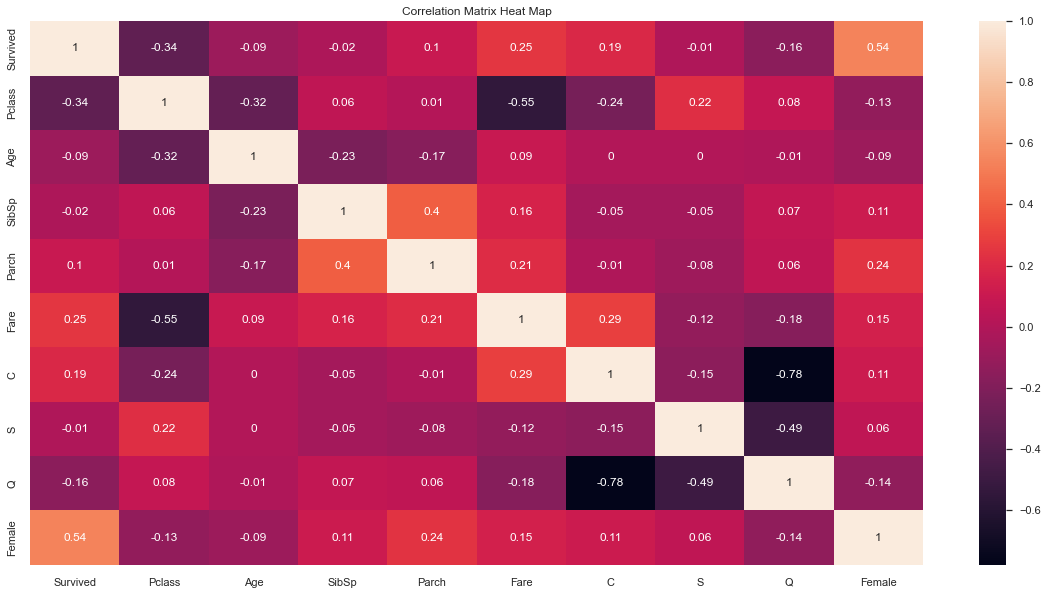

In [29]:
# correaltion heat map
CorrelationMatrix = df.corr().round(2) #define correlation matrix 
plt.figure(figsize= (20, 10)) # (width,hight) 
plt.title('Correlation Matrix Heat Map')
sns.heatmap(data= CorrelationMatrix,annot=True) # "annot=True" displays the Coefficients 
plt.show()

<div class="alert alert-block alert-info">
<b>Note:</b> Heat map shows correlation with Survived = 1 </div>

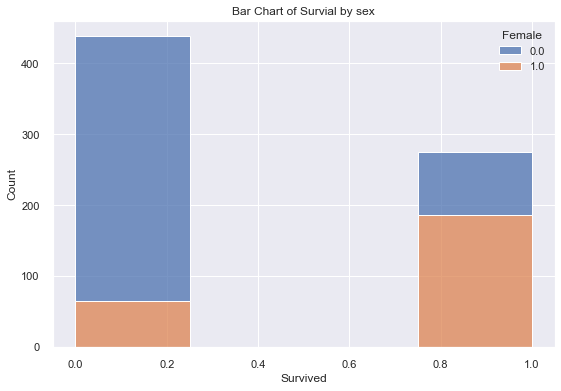

In [30]:
plt.figure(figsize=(9,6))
sns.set(style="darkgrid")
sns.histplot(binwidth=.25,
            x='Survived',
            hue='Female',
            data=df,
            stat="count",
            multiple="stack")
plt.title('Bar Chart of Survial by sex')
plt.show()
# more men died than women 
# "save the women and children first" 
# higher preportion of men died 

In [31]:
# raw counts of each feature 
print(df['Survived'].value_counts())
print(df['Female'].value_counts())

0    438
1    274
Name: Survived, dtype: int64
0.0    462
1.0    250
Name: Female, dtype: int64


- Many more men dided then women and there also seems to be a highr preportion of men who dided. 

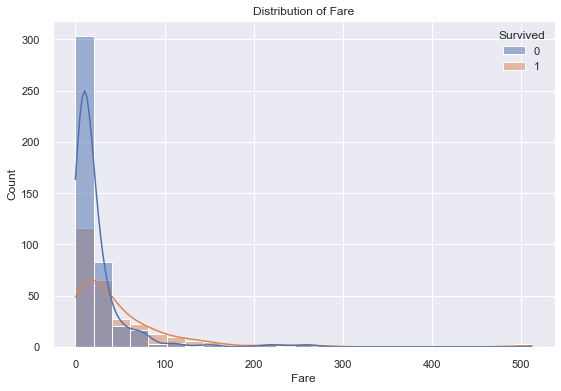

In [32]:
plt.figure(figsize=(9,6))
sns.set(style="darkgrid")
sns.histplot(x= "Fare",
             data=df,
              bins=25,
              hue="Survived",
              kde=True)
plt.title('Distribution of Fare')
plt.show()

#seems like more people who had lower fares dided. 
# there is a small diffrence tho

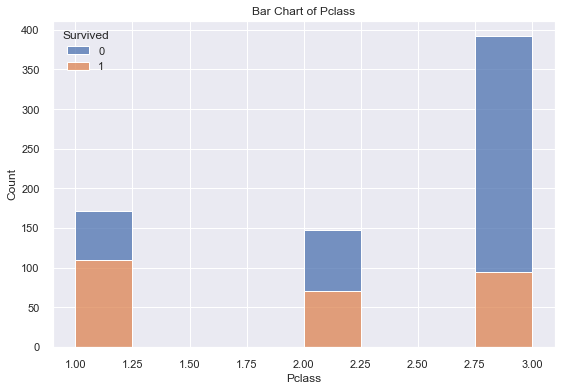

In [33]:
plt.figure(figsize=(9,6))
sns.set(style="darkgrid")
sns.histplot(binwidth=.25,
            x='Pclass',
            hue='Survived',
            data=df,
            stat="count",
            multiple="stack")
plt.title('Bar Chart of Pclass')
plt.show()
# a much higher preportion of 3rd class passengers died 
# 

In [34]:
#this displays the raw count in each class and below is their survival rate
print(df['Pclass'].value_counts())
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

3    392
1    172
2    148
Name: Pclass, dtype: int64


,Pclass,Survived
0,1,0.633721
1,2,0.472973
2,3,0.242347


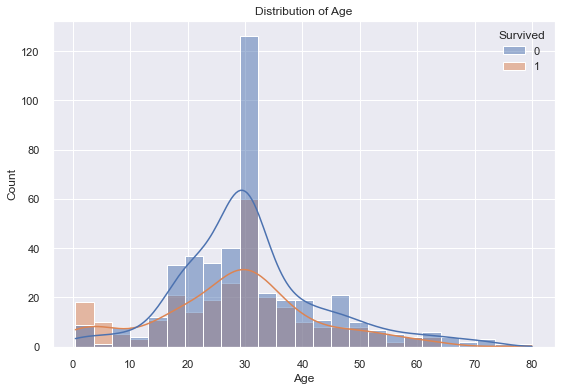

In [35]:
plt.figure(figsize=(9,6))
sns.set(style="darkgrid")
sns.histplot(x= "Age",
             data=df,
              bins=25,
              hue="Survived",
              kde=True)
plt.title('Distribution of Age')
plt.show()
#there is not much of a difference 
# very young had a much better chance of Surviving 

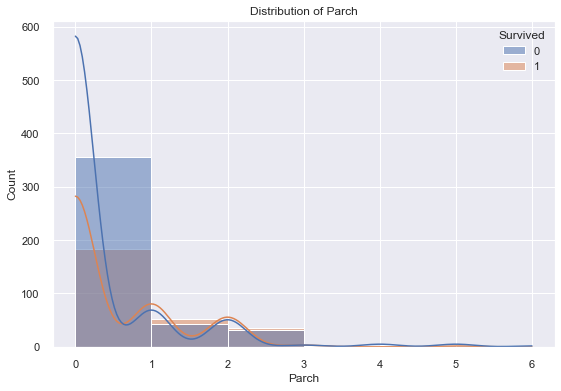

In [36]:
plt.figure(figsize=(9,6))
sns.set(style="darkgrid")
sns.histplot(x= "Parch",
             data=df,
              bins=6,
              hue="Survived",
              kde=True)
plt.title('Distribution of Parch')
plt.show()
# people 

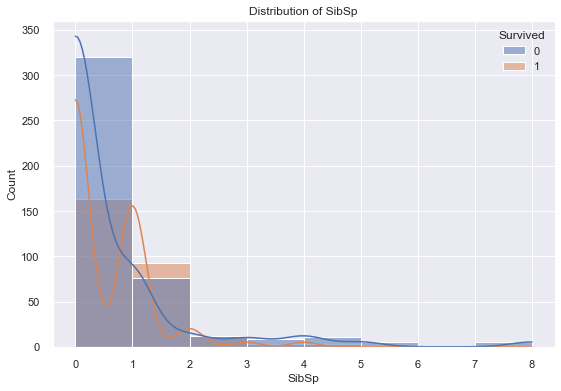

In [37]:
plt.figure(figsize=(9,6))
sns.set(style="darkgrid")
sns.histplot(x= "SibSp",
             data=df,
              bins=8,
              hue="Survived",
              kde=True)
plt.title('Distribution of SibSp')
plt.show()
# those with no siblings on board had a much higher chance of dying

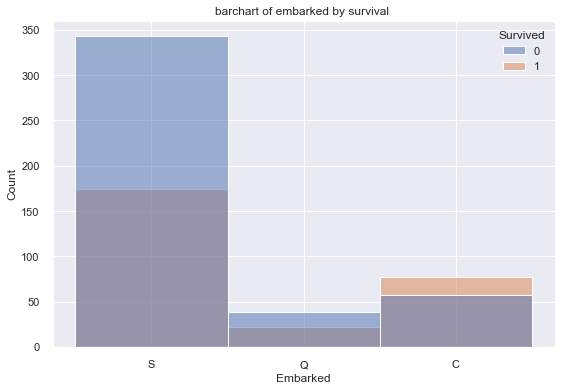

In [38]:
plt.figure(figsize=(9,6))
sns.set(style="darkgrid")
sns.histplot(x= "Embarked",
             data=strat_train,
              bins=3,
              hue="Survived",
              kde=False)
plt.title('barchart of embarked by survival ')
plt.show()

## Train the model: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier" target="_blank">sklearn.ensemble.RandomforestClassifier</a>
- Used gridsearch to tune the hyperpramerters  https://scikit-learn.org/stable/modules/grid_search.html 

- Used out of bag scoring https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html

<div class="alert alert-block alert-info">
<b>Info:</b> Validation Set Approach</div>

In [39]:
# list of feature names 
for col in df.columns:
    print(col)

Survived
Pclass
Age
SibSp
Parch
Fare
C
S
Q
Female


In [40]:
# Slice the data 
X_train = df.iloc[:, 1:10]
y_train = df.iloc[:,0]

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

start_time = time.time()

#model
rfc = RandomForestClassifier()
#hyper pramater tuning
param_gird = [
    {"n_estimators":[100,500,1000],
     "max_depth":[None,5,10], 
     "min_samples_split":[2,3,4],
     "max_features":['sqrt'],
     "oob_score":['True'],
     "bootstrap":['True']
    }
]

grid_search = GridSearchCV(rfc,param_gird, cv=5,scoring="accuracy",return_train_score=True)
grid_search.fit(X_train,y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 70.84929490089417 seconds ---


In [42]:
#save the best CV model 
final_rfc = grid_search.best_estimator_
final_rfc

RandomForestClassifier(bootstrap='True', max_depth=10, max_features='sqrt',
                       min_samples_split=4, n_estimators=500, oob_score='True')

In [43]:
# clean the test data 
test = pipeline.fit_transform(titanic_test_data)

In [44]:
X_test = test.iloc[:, 0:9]

In [45]:
#training Accuracy score 
final_rfc.score(X_train,y_train)

0.9325842696629213

In [46]:
#out of bag score
final_rfc.oob_score_

0.8356741573033708

In [47]:
#make predicitons on validation data 
pred= final_rfc.predict(X_train)

In [48]:
# Dont run yet! 
# Gotta create predict_labels 
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, pred)

0.9206079392060793

In [49]:

# confusion matrix Statistics display
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_train, pred)
tn, fp, fn, tp = confusion_matrix(y_train, pred).ravel()
(tn, fp, fn, tp)

(426, 12, 36, 238)

In [50]:
print("Precision:   ", tp/(tp+fp))
print("Specificity: ", tn/(fp+tn))
print("Sensitivity: ", tp/(tp+fn))
print("Accuracy:    ", (tp+tn)/(tp+tn+fp+fn))
print("Error rate:  ", (fp+fn)/(tp+tn+fp+fn))

Precision:    0.952
Specificity:  0.9726027397260274
Sensitivity:  0.8686131386861314
Accuracy:     0.9325842696629213
Error rate:   0.06741573033707865


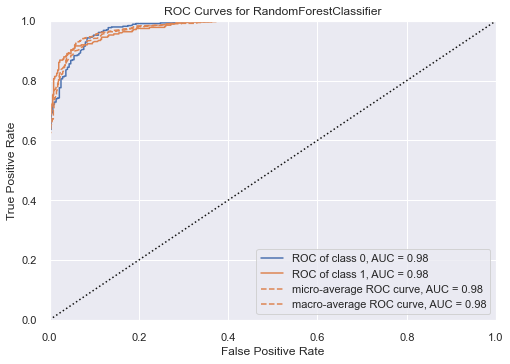

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [51]:
#ROC curve 
visualizer = ROCAUC(final_rfc)
##set_palette('bold')
visualizer.fit(X_train,y_train)
visualizer.score(X_train,y_train)
visualizer.show()

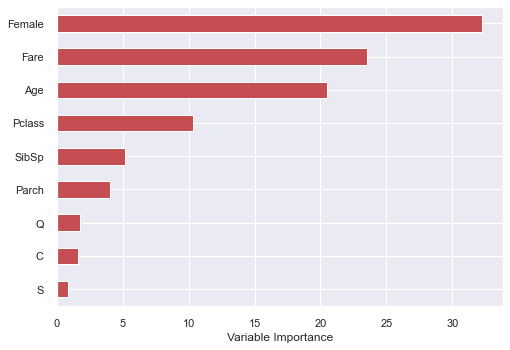

In [53]:
# RF provides multiple ways to interpret the model. One way is to see the importance of each feature.
Importance = pd.DataFrame({'Importance':final_rfc.feature_importances_*100}, index=X_train.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [54]:
# create test predictions 
predictions_rfc = final_rfc.predict(X_test)

In [55]:
predictions_rfc

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Notes: 
- Should create markers for data that has been imputed 

- This is documentation for the GridSearch scoring metrics  https://scikit-learn.org/stable/modules/model_evaluation.html

## Model #2: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier" target="_blank">sklearn.ensemble.AdaBoostClassifier</a>

In [56]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [57]:
# Slice the data 
X_train = df.iloc[:, 1:10]
y_train = df.iloc[:,0]

In [58]:
start_time = time.time()
Ada_clf = AdaBoostClassifier()

param_gird = [
    {"n_estimators":[10,100,200,500], 
     "base_estimator":[None], 
     "learning_rate":[0.1,1,10],
     "algorithm":['SAMME.R'],
     "random_state":[0]
    }
]

grid_search = GridSearchCV(Ada_clf,param_gird, cv=5,scoring="accuracy",return_train_score=True)
grid_search.fit(X_train,y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 9.444004774093628 seconds ---


In [59]:
Adaboost_clf = grid_search.best_estimator_
Adaboost_clf

AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=0)

In [60]:
Adaboost_clf.score(X_train,y_train)

0.827247191011236

In [61]:
#make predicitons on validation data 
pred_clf= Adaboost_clf.predict(X_train)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, pred)

0.9206079392060793

In [62]:
# confusion matrix Statistics display
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, pred_clf)
tn, fp, fn, tp = confusion_matrix(y_train, pred_clf).ravel()
(tn, fp, fn, tp)

(381, 57, 66, 208)

In [63]:
print("Precision:   ", tp/(tp+fp))
print("Specificity: ", tn/(fp+tn))
print("Sensitivity: ", tp/(tp+fn))
print("Accuracy:    ", (tp+tn)/(tp+tn+fp+fn))
print("Error rate:  ", (fp+fn)/(tp+tn+fp+fn))

Precision:    0.7849056603773585
Specificity:  0.8698630136986302
Sensitivity:  0.7591240875912408
Accuracy:     0.827247191011236
Error rate:   0.17275280898876405


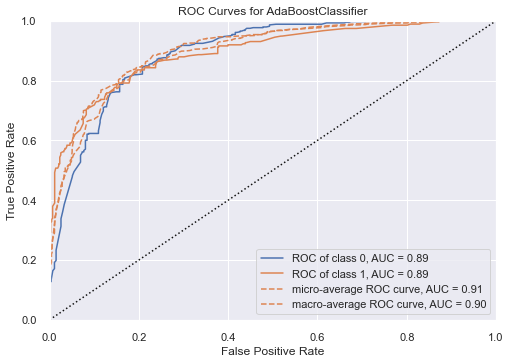

<AxesSubplot:title={'center':'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [64]:
#ROC curve 
visualizer = ROCAUC(Adaboost_clf)
##set_palette('bold')
visualizer.fit(X_train,y_train)
visualizer.score(X_train,y_train)
visualizer.show()

In [65]:
# create test predictions 
predictions_clf = Adaboost_clf.predict(X_test)

In [66]:
predictions_clf

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from scipy.stats import loguniform


In [68]:
# Slice the data 
X_train = df.iloc[:, 1:10]
y_train = df.iloc[:,0]

In [69]:

#Train the model 
start_time = time.time()
LR = LogisticRegression() # Define the model 

param_dist = {                                    # Define model paramerters 
    'C': loguniform(1e-03, 1e3),                    # C = Regularization Strength(.001,1000)
    'penalty': ['l1'],                            #('l1' = lasso/'l2' = ridge/'elasticnet' = l1 & l2) 
  # 'max_iter': list(range(100,800,100)),
    'solver': ['saga'] 
}
# random search 
n_iter_search = 15
LR_search = RandomizedSearchCV(LR, param_distributions=param_dist, n_iter=n_iter_search, cv=5, scoring="accuracy" )
# fitting the model for random search 
LR_search.fit(X_train,y_train)
# find the best model 
LR_search.best_params_
# summarize

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.5804800987243652 seconds ---


In [70]:
# store the model
LR = LR_search.best_estimator_
LR

LogisticRegression(C=631.1513884627908, penalty='l1', solver='saga')

In [72]:
# store model coefficents 
coeff=LR.coef_
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(LR.coef_))], axis = 1)
coefficients

,0,0
0,Pclass,-0.058356
1,Age,-0.025455
2,SibSp,-0.031437
3,Parch,-0.000441
4,Fare,0.014298
5,C,0.009662
6,S,0.001709
7,Q,-0.016691
8,Female,0.058169


In [73]:
#cv accuracy score 
LR.score(X_train,y_train)

0.6839887640449438

## Decision tree

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
start_time = time.time()
decision_tree = DecisionTreeClassifier()

param_gird = [
    {"n_estimators":[10,100,200,500], 
     "base_estimator":[None], 
     "learning_rate":[0.1,1,10],
     "algorithm":['SAMME.R'],
     "random_state":[0]
    }
]

grid_search = GridSearchCV(decision_tree,param_gird, cv=5,scoring="accuracy",return_train_score=True)
grid_search.fit(X_train,y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.04385995864868164 seconds ---


In [80]:
decision_tree = grid_search.best_estimator_
decision_tree

DecisionTreeClassifier()

In [81]:
decision_tree.score(X_train,y_train)

0.9859550561797753

In [76]:
decision_tree.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [75]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

98.6

In [77]:
Y_pred

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,